## Time Series Plots, Two Country, Deterministic

No aggregate shock time series

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [4]:
from world_econ import *

Impulse response in the two country case

In [5]:
cx = Country(v1=2.5, z=3, alpha=0.55)
cy = Country(v1=2.5, z=3, alpha=0.55)

alpha, theta, R = cx.alpha, cx.theta, cx.R
wstar = cx.wstar

ts_length = 15
shock_date = 3

# Set up storage
wx = []
wy = []
yx = []
yy = []
zx = []
zy = []
capx = []  
capy = []
world_r = []

# Initial conditions, wages in each country
x, y = cx.wstar, cy.wstar   

# Simulate to smooth things out
for i in range(10):
    r = integrated_world_r(cx, x, cy, y)
    x = cx.update_wage(x, r)
    y = cy.update_wage(y, r)

In [6]:
# Simulate
for i in range(ts_length):

    wx.append(x)
    wy.append(y)
    yx.append(x / (1 - alpha))
    yy.append(y / (1 - alpha))

    # Get interest rate for world econ
    r = integrated_world_r(cx, x, cy, y)
    world_r.append(r)

    # Store capital accounts
    capx.append(-cx.current_account(x, r))
    capy.append(-cy.current_account(y, r))

    # Adjust shock
    if i == shock_date:
        cx.z = cx.z * 1.1
        cx.calibrate()
    if i==shock_date + 1:
        cx.z = cx.z / 1.1
        cx.calibrate()

    zx.append(cx.z)
    zy.append(cy.z)
    
    # Update wages
    x = cx.update_wage(x, r)
    y = cy.update_wage(y, r)


zx = np.asarray(zx)
zy = np.asarray(zy)
yy = np.asarray(yy)
yx = np.asarray(yx)

capx = capx / yx
capy = capy / yy

zx = zx / zx[0]
zy = zy / zy[0]
yy = yy / yy[0]
yx = yx / yx[0]

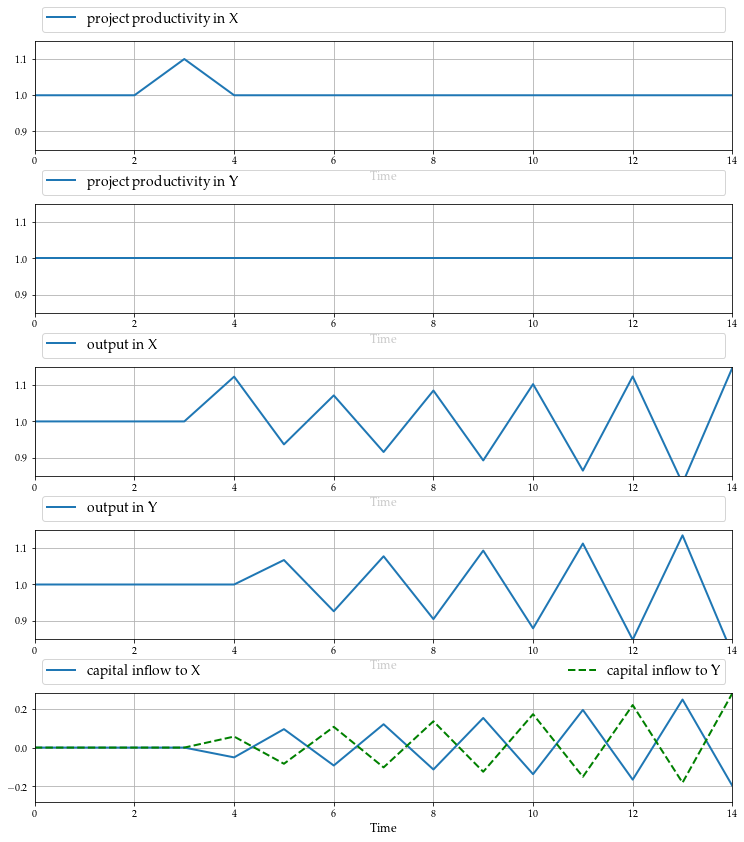

In [11]:
n_rows = 5
fig, axes = plt.subplots(n_rows, 1, figsize=(12.5, 14))

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand', 'fontsize' : 14}
p_args = {'lw' : 2, 'alpha' : 0.7}

plt.subplots_adjust(hspace=0.5)

for i in range(n_rows):
    axes[i].grid()
    axes[i].set_xlabel(r'Time', fontsize=12)
    axes[i].set_xlim(0, ts_length-1)


idx = range(ts_length)

ax = axes[0]
ax.plot(idx, zx, lw=2, label='project productivity in X')
ax.set_ylim(0.85, 1.15)
ax.legend(ncol=1, **legend_args)
ax.set_yticks((0.9, 1.0, 1.1))

ax = axes[1]
ax.plot(idx, zy, lw=2, label='project productivity in Y')
ax.set_ylim(0.85, 1.15)
ax.legend(ncol=1, **legend_args)
ax.set_yticks((0.9, 1.0, 1.1))

ax = axes[2]
ax.plot(idx, yx, lw=2, label='output in X')
ax.set_ylim(0.85, 1.15)
ax.legend(ncol=1, **legend_args)
ax.set_yticks((0.9, 1.0, 1.1))

ax = axes[3]
ax.plot(idx, yy, lw=2, label='output in Y')
ax.set_ylim(0.85, 1.15)
ax.legend(ncol=1, **legend_args)
ax.set_yticks((0.9, 1.0, 1.1))

ax = axes[4]
ax.plot(idx, capx, lw=2, label='capital inflow to X')
ax.set_ylim(-0.10, 0.10)
ax.legend(ncol=1, **legend_args)

ax = axes[4]
ax.plot(idx, capy, 'g--', lw=2, label='capital inflow to Y')
ax.set_ylim(-0.28, 0.28)
ax.legend(ncol=2, **legend_args)


plt.savefig("foo.pdf")
plt.show()

### Plot of financial integration from autarky.

In [71]:
wx, wy = 0.46, 0.52

# == The first n1 periods are in autarky === #
n1 = 5

# == The next n2 periods are integrated === #
n2 = 15
n = n1 + n2

# == Simulations == #
wx_ts = []
wy_ts = []
r_x_ts = []
r_y_ts = []
cap_x_ts = []
cap_y_ts = []

In [72]:
# == Simulate autarky == #
for i in range(n1):
    
    wx_ts.append(wx)
    wy_ts.append(wy)
    
    next_r_x = cx.autarky_r(wx)
    next_r_y = cy.autarky_r(wy)
    
    cap_x_ts.append(cx.current_account(wx, next_r_x))
    cap_y_ts.append(cy.current_account(wy, next_r_y))
    
    wx = cx.update_wage(wx, next_r_x)
    wy = cy.update_wage(wy, next_r_y)
    
    r_x_ts.append(next_r_x)
    r_y_ts.append(next_r_y)

In [73]:
# == Simulate integrated econ == #
for i in range(n2):
    
    wx_ts.append(wx)
    wy_ts.append(wy)
    
    next_r_x = integrated_world_r(cx, wx, cy, wy)
    next_r_y = next_r_x
    
    cap_x_ts.append(cx.current_account(wx, next_r_x))
    cap_y_ts.append(cy.current_account(wy, next_r_y))
    
    wx = cx.update_wage(wx, next_r_x)
    wy = cy.update_wage(wy, next_r_y)
    
    r_x_ts.append(next_r_x)
    r_y_ts.append(next_r_y)

Now plot.

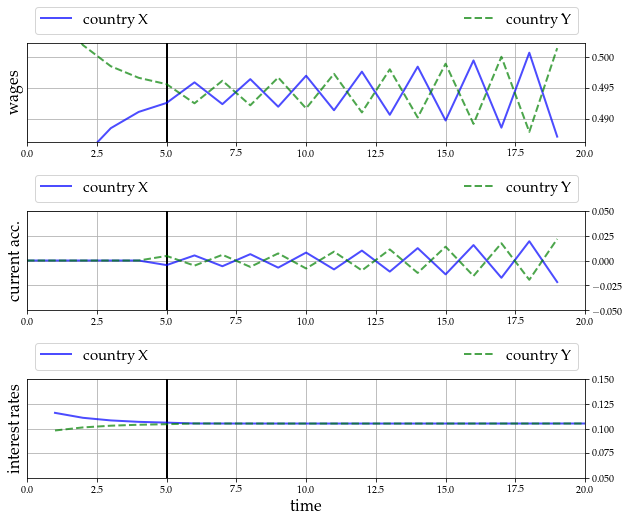

In [74]:

fig, axes = plt.subplots(3, 1, figsize=(10, 8.0))

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand', 'fontsize' : 15}
p_args = {'lw' : 2, 'alpha' : 0.7}

plt.subplots_adjust(hspace=0.7)


ymin =  min(wx, wy)
ymax =  max(wx, wy)
    
axes[0].set_ylim(ymin, ymax)
axes[1].set_ylim(-0.05, 0.05)
axes[2].set_ylim(0.05, 0.15)

axes[0].vlines([n1], ymin, ymax, color='k', lw=2)
axes[1].vlines([n1], -0.05, 0.05, color='k', lw=2)
axes[2].vlines([n1], 0.05, 0.15, color='k', lw=2)

# == Plot wages == #

ax = axes[0]
ax.set_ylabel('wages', fontsize=16)
ax.plot(range(n), wx_ts, 'b-', label='country X', **p_args)
ax.plot(range(n), wy_ts, 'g--', label='country Y', **p_args)

# == Plot capital account == #

ax = axes[1]
ax.set_ylabel('current acc.', fontsize=16)
ax.plot(range(n), cap_x_ts, 'b-', label='country X', **p_args)
ax.plot(range(n), cap_y_ts, 'g--', label='country Y', **p_args)

# == Plot interest rate == #

ax = axes[2]
ax.set_ylabel('interest rates', fontsize=16)
ax.set_xlabel('time', fontsize=16)
ax.plot(range(1, n+1), r_x_ts[0:], 'b-', label='country X', **p_args)
ax.plot(range(1, n+1), r_y_ts[0:], 'g--', label='country Y', **p_args)

for ax in axes:
    ax.set_xlim(0, n)
    ax.grid()
    ax.yaxis.tick_right()
    ax.legend(ncol=2, **legend_args)

plt.savefig("foo.pdf")
plt.show()